In [108]:
# titanic dataset
# first import all required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler


import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def fun(a):
    if(a =='male'):
        return 0
    else:
        return 1

In [7]:
data['Sex'] = data['Sex'].map(fun)

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [9]:
# drop data
dr = ['PassengerId','Name','Ticket','Cabin']

In [10]:
data.drop(dr,axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [12]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [14]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
def fun(a):
    if(a=='S'):
        return 0
    elif(a=='C'):
        return 1
    else:
        return 2

In [17]:
data['Embarked'] =data['Embarked'].map(fun)

In [18]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mean())

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [20]:
data.drop('Fare',axis=1,inplace=True)

In [21]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


# EDA

In [22]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.114954
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,0.034393
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.125265
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.018371
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,-0.062871
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,-0.081437
Embarked,0.114954,0.034393,0.125265,0.018371,-0.062871,-0.081437,1.000000


<Axes: >

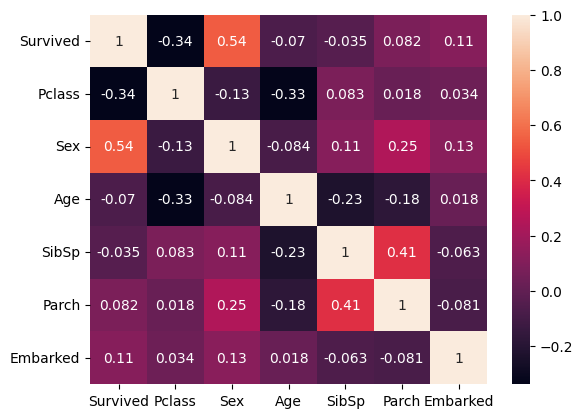

In [23]:
sns.heatmap(data.corr(), annot =True)

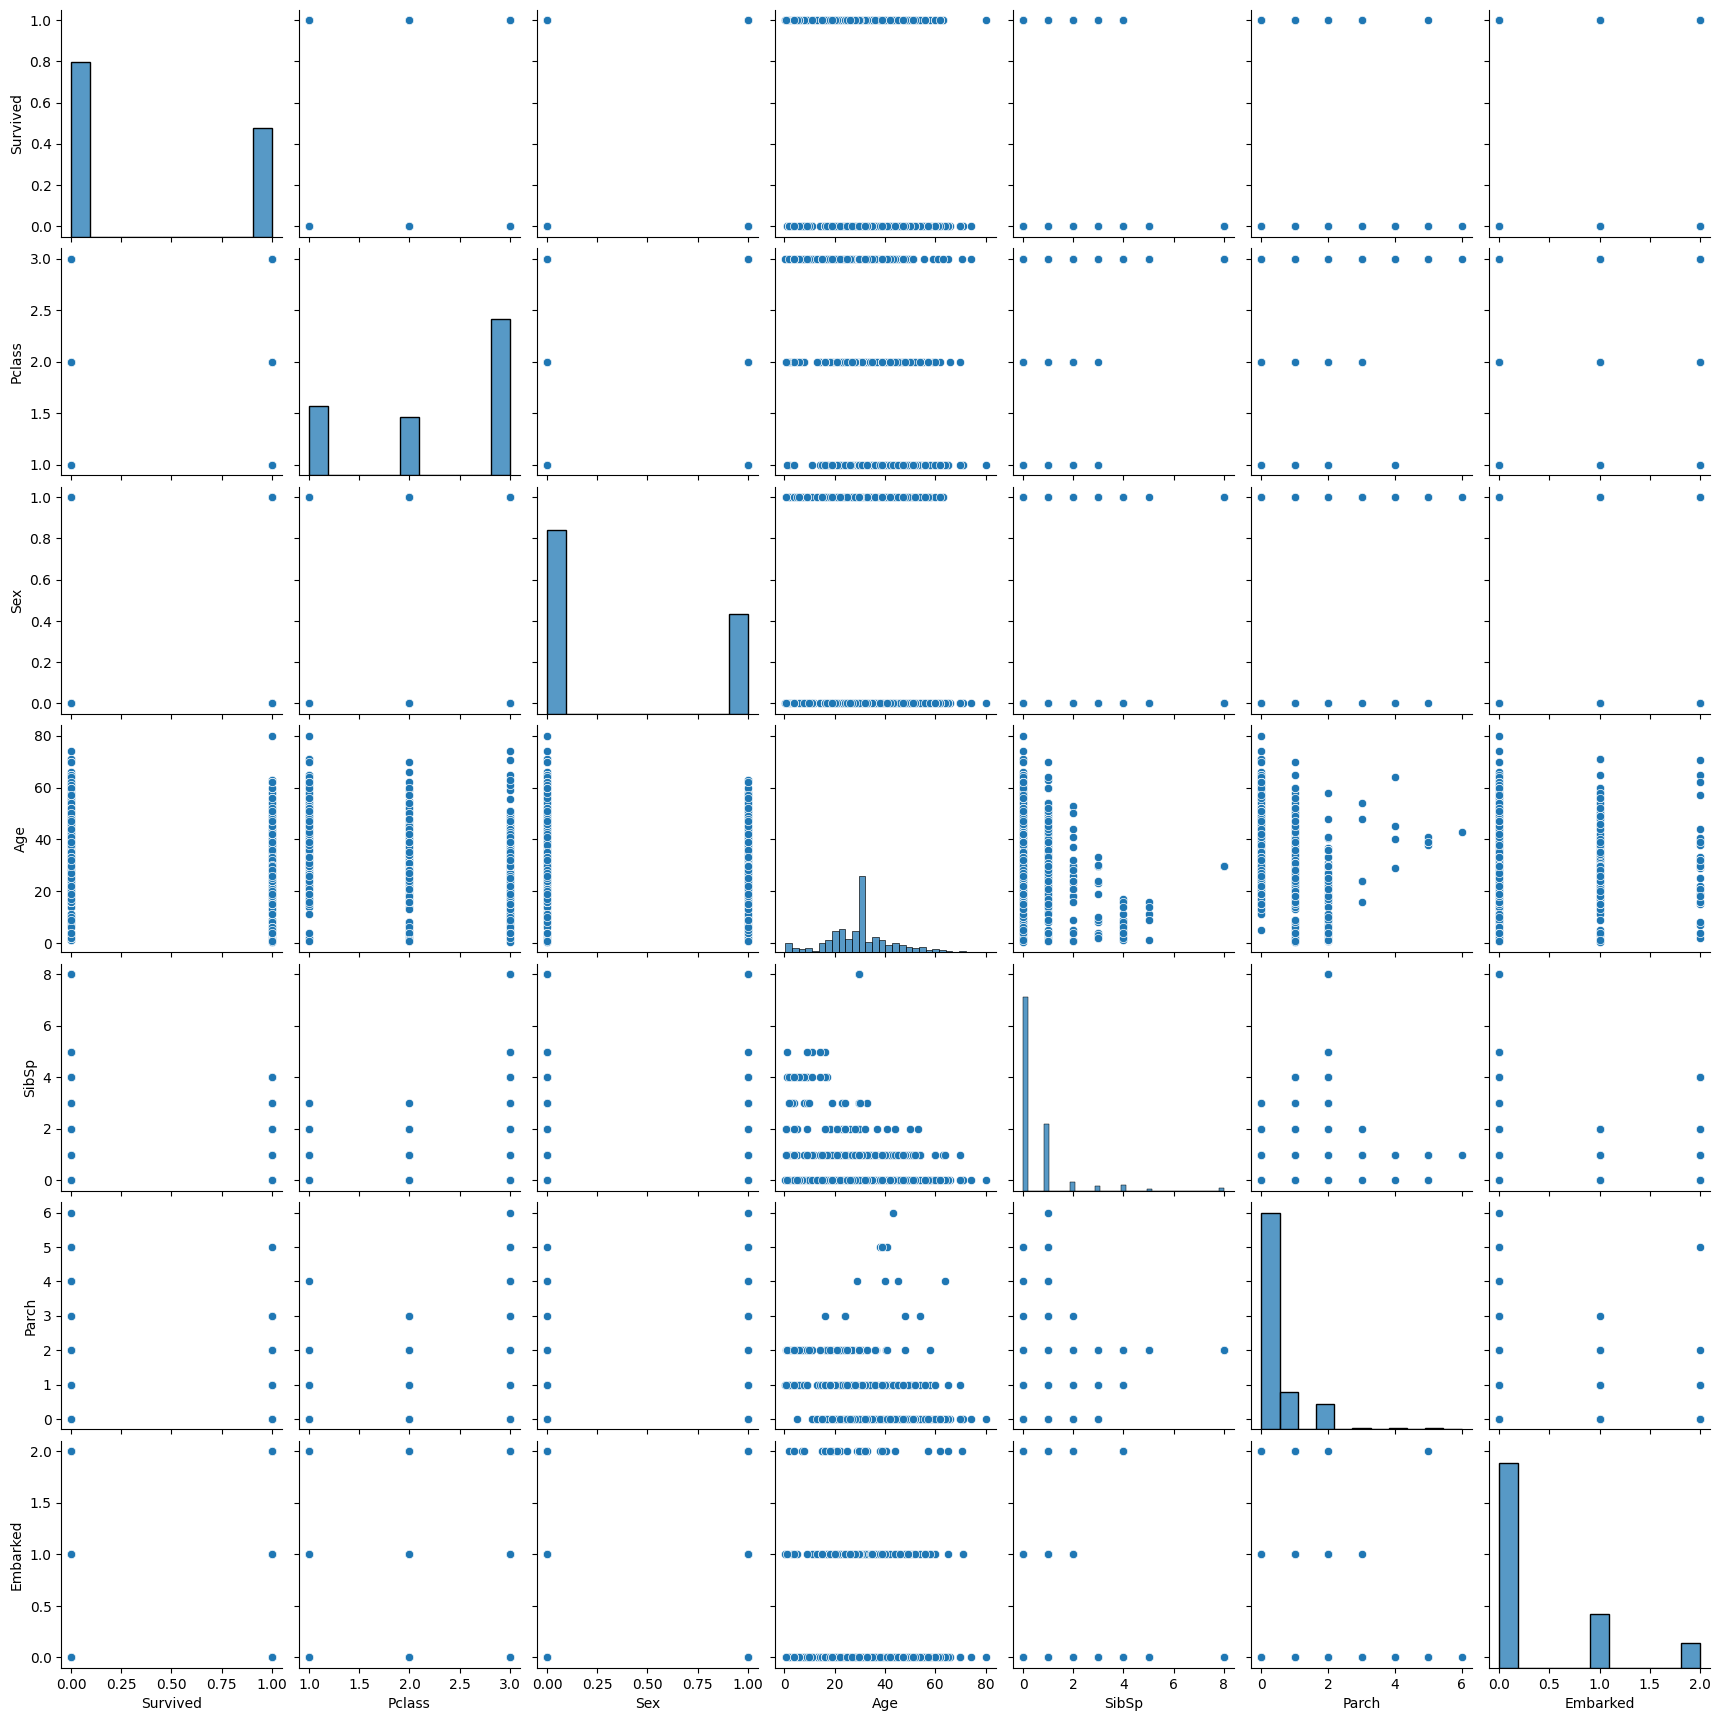

In [24]:
sns.pairplot(data)

<Axes: xlabel='Pclass', ylabel='Survived'>

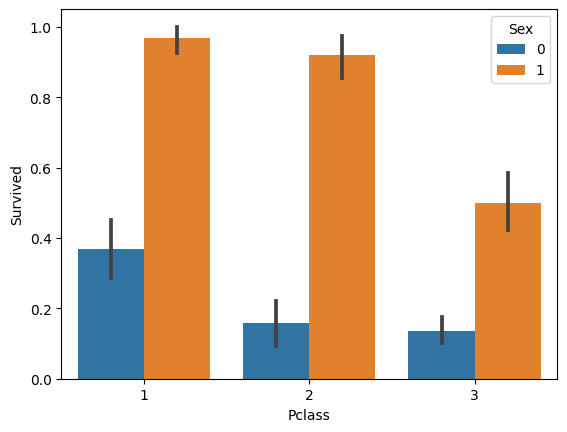

In [25]:
sns.barplot(x=data['Pclass'] ,y=data['Survived'],hue=data['Sex'])

<Axes: xlabel='Embarked', ylabel='Survived'>

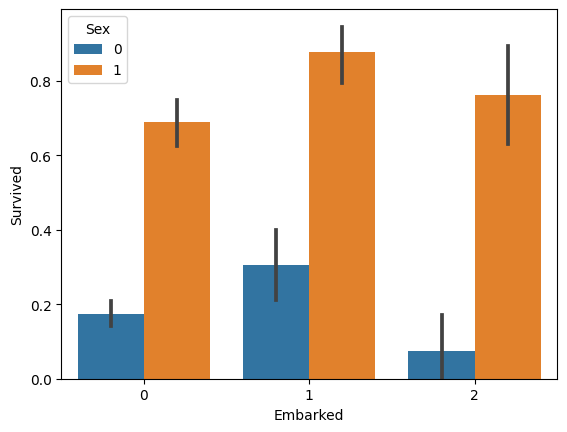

In [26]:
sns.barplot(x=data['Embarked'] ,y=data['Survived'],hue=data['Sex'])

In [27]:
# split 
y = data['Survived']
x=data.drop('Survived',axis=1)


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [29]:
# feature scaling
st = StandardScaler()
mmax = MinMaxScaler()

In [30]:
x_trainst = st.fit_transform(x_train)
x_trainmmax = mmax.fit_transform(x_train)

xtrain= x_trainst
ytrain = y_train
ytest = y_test

xtrains = x_trainmmax

In [31]:
x_testst = st.transform(x_test)
x_testmmax = st.transform(x_test)
xtest = x_testst
xtests = x_testmmax

In [32]:
# model use here

In [33]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [34]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [35]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [37]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  75.78
Support Vector      :  76.23
Decision Tree       :  75.34
K-NN Classifier     :  77.58
Random Forest       :  75.78


In [38]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [39]:
logreg.fit(xtrains, ytrain)
svc_classifier.fit(xtrains, ytrain)
dt_classifier.fit(xtrains, ytrain)
knn_classifier.fit(xtrains, ytrain)
rf_classifier.fit(xtrains, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [40]:
logreg_ypred = logreg.predict(xtests)
svc_classifier_ypred = svc_classifier.predict(xtests)
dt_classifier_ypred = dt_classifier.predict(xtests)
knn_classifier_ypred = knn_classifier.predict(xtests)
rf_classifier_ypred = rf_classifier.predict(xtests)

In [41]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [42]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  70.4
Support Vector      :  65.47
Decision Tree       :  47.09
K-NN Classifier     :  69.06
Random Forest       :  58.3


In [43]:
# final model 

In [58]:
model1 = SVC()


In [45]:
model.fit(xtrain, ytrain)


SVC()

In [46]:
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)


In [47]:
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))


Support Vector      :  65.47


In [48]:
pred =model.predict(xtest)

In [49]:
accuracy_score(pred,y_test)

0.7623318385650224

In [50]:
xb = [1,0,16,0,1,0]

In [51]:
sd =st.transform([xb])

In [52]:
model.predict(sd)

array([0], dtype=int64)

In [53]:
from joblib import dump

In [55]:
dump(model, './../savedModels/model.joblib')

['./../savedModels/model.joblib']

In [56]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
429,3,0,32.000000,0,0,0
585,1,1,18.000000,0,2,0
492,1,0,55.000000,0,0,0
423,3,1,28.000000,1,1,0
54,1,0,65.000000,0,1,1
...,...,...,...,...,...,...
733,2,0,23.000000,0,0,0
659,1,0,58.000000,0,2,1
109,3,1,29.699118,1,0,2
342,2,0,28.000000,0,0,0


In [59]:
model1.fit(x_train,y_train)

SVC()

In [61]:
pred =model1.predict(x_test)

In [63]:
r2_score(pred,y_test)

-7.336448598130842

In [64]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


In [65]:
y = data['Survived']

In [66]:
x = data.drop('Survived',axis=1)

In [67]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [68]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [70]:
model = LogisticRegression()

In [71]:
model.fit(x_train,y_train)

LogisticRegression()

In [72]:
pred = model.predict(x_test)

In [76]:
r2_score(pred,y_test)

-0.036316695352839545

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


<Axes: >

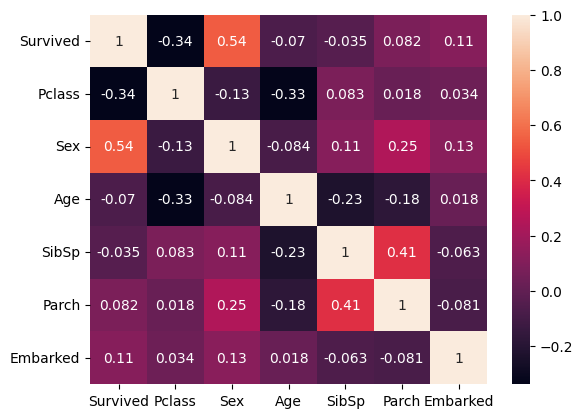

In [77]:
sns.heatmap(data.corr(),annot=True)

In [79]:
x1 = data[['Pclass','Sex','Embarked']]

<Axes: >

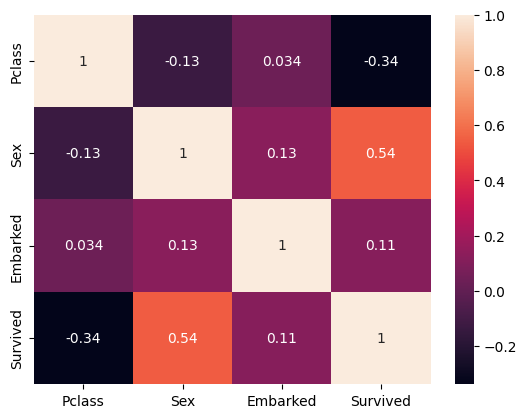

In [86]:
sns.heatmap(pd.concat([x1,y],axis=1).corr(), annot=True)

In [87]:
model = LinearRegression()

In [91]:
x_train,x_test, y_train, y_test = train_test_split(x1,y)

In [92]:
model.fit(x_train,y_train )

LinearRegression()

In [93]:
pred =  model.predict(x_test)

In [110]:
accuracy_score(pred, y_test)

0.7847533632286996

In [103]:
model = LogisticRegression()

In [104]:
model.fit(x_train,y_train )

LogisticRegression()

In [105]:
pred =  model.predict(x_test)

In [109]:
accuracy_score(pred, y_test)

0.7847533632286996

In [112]:
model = SVC()


In [113]:
model.fit(x_train, y_train)

SVC()

In [116]:
pred =model.predict(x_test)

In [115]:
y_test

602    0
890    0
458    1
445    1
148    0
      ..
725    0
831    1
566    0
542    0
644    1
Name: Survived, Length: 223, dtype: int64

In [119]:
accuracy_score(pred, y_test)

0.7713004484304933

In [120]:
x_test

,Pclass,Sex,Embarked
602,1,0,0
890,3,0,2
458,2,1,0
445,1,0,0
148,2,0,0
...,...,...,...
725,3,0,0
831,2,0,0
566,3,0,0
542,3,1,0


In [121]:
dump(model, './../savedModels/model1.joblib')

['./../savedModels/model1.joblib']

In [124]:
x_test['Embarked'].unique()

array([0, 2, 1], dtype=int64)